In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pickle
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
np.random.seed(500)

In [ ]:
Corpus = pd.read_csv(r"/content/Sexist_Statements.csv",encoding='latin-1')


In [ ]:
# Step - a : Remove blank rows if any.
Corpus['Sentences'].dropna(inplace = True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['Sentences'] = [entry.lower() for entry in Corpus['Sentences']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['Sentences']= [word_tokenize(entry) for entry in Corpus['Sentences']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['Sentences']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

print(Corpus['text_final'])

0                                       ['woman', 'good']
1                   ['dress', 'sexy', 'sign', 'contract']
2                                              ['period']
3                                      ['stop', 'bitchy']
4       ['leave', 'early', 'child', 'instead', 'husband']
                              ...                        
1132    ['opportunity', 'like', 'night', 'owl', 'like'...
1133    ['question', 'love', 'living', 'love', 'love',...
1134    ['genius', 'master', 'ordinary', 'man', 'try',...
1135    ['want', 'know', 'real', 'reason', 'behind', '...
1136    ['questioning', 'important', 'breakthrough', '...
Name: text_final, Length: 1137, dtype: object


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Label'],test_size=0.3)

Encoder = LabelEncoder()
# print(Train_Y)
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# print(Train_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
# print((Train_X))
# print(Train_X_Tfidf)

0.4  ->  74.56140350877193
0.5  ->  76.60818713450293
0.7  ->  79.53216374269006
0.75  ->  79.82456140350878
0.8  ->  79.53216374269006
0.9  ->  79.23976608187134
1  ->  78.65497076023392
1.2  ->  77.77777777777779
1.25  ->  77.77777777777779
1.4  ->  77.48538011695906
1.5  ->  76.90058479532163
2  ->  76.60818713450293
2.5  ->  76.0233918128655
3  ->  75.73099415204678


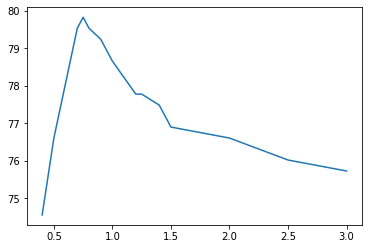

In [ ]:
C_vals = [0.4, 0.5, 0.7, 0.75, 0.8, 0.9, 1, 1.2, 1.25, 1.4, 1.5, 2, 2.5, 3]
accuracies = list()
for c in C_vals:
  SVM = svm.SVC(C=c, kernel='linear', degree=3, gamma='auto', probability=True)
  SVM.fit(Train_X_Tfidf,Train_Y)

  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(Test_X_Tfidf)
  CM = (confusion_matrix(Test_Y, predictions_SVM))
  PS=precision_score(Test_Y, predictions_SVM, average='binary')
  RS=recall_score(Test_Y, predictions_SVM, average='binary')
  print(c, " -> ",accuracy_score(predictions_SVM, Test_Y)*100)
  accuracies.append(accuracy_score(predictions_SVM, Test_Y)*100)

plt.plot(C_vals, accuracies)

3  ->  79.82456140350878
3  ->  49.41520467836257
3  ->  49.41520467836257
3  ->  49.41520467836257


<BarContainer object of 4 artists>

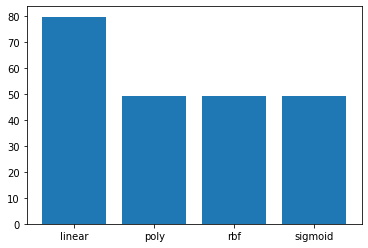

In [ ]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = list()
for k in kernel_list:
  SVM = svm.SVC(C=0.75, kernel=k, degree=3, gamma='auto', probability=True)
  SVM.fit(Train_X_Tfidf,Train_Y)

  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(Test_X_Tfidf)
  CM = (confusion_matrix(Test_Y, predictions_SVM))
  PS=precision_score(Test_Y, predictions_SVM, average='binary')
  RS=recall_score(Test_Y, predictions_SVM, average='binary')
  print(c, " -> ",accuracy_score(predictions_SVM, Test_Y)*100)
  accuracies.append(accuracy_score(predictions_SVM, Test_Y)*100)

plt.bar(kernel_list, accuracies)

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.75, kernel='linear', gamma='auto', probability=True)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
CM = (confusion_matrix(Test_Y, predictions_SVM))
PS=precision_score(Test_Y, predictions_SVM, average='binary')
RS=recall_score(Test_Y, predictions_SVM, average='binary')
print(CM)
print("SVM Precision Score ->", PS)
print("SVM Recall Score ->", RS)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'finalized_svm_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

[[123  50]
 [ 19 150]]
SVM Precision Score -> 0.75
SVM Recall Score -> 0.8875739644970414
SVM Accuracy Score ->  79.82456140350878


In [ ]:
temp, test_sentence, temp2, temp3 = model_selection.train_test_split(Corpus['Sentences'],Corpus['Label'],test_size=0.3)


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

predictions_SVM = loaded_model.predict_proba(Test_X_Tfidf)
ans = list()

i=0
# print(test_sentence)
for p in predictions_SVM:
  if(p[1]-p[0]>0.1):
    ans.append(1)
  elif(p[0]-p[1]>0.1):
    ans.append(0)
  else:
    ans.append(0.5)
    print(test_sentence[test_sentence.index[i]])
  i+=1

print(ans)
print(Test_Y)

# Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ",accuracy_score(ans, Test_Y)*100)

['i', "'d", 'try', 'to', 'channel', 'my', 'nervous', 'energy', 'in', 'a', 'positive', 'way', 'into', 'strength', 'and', 'endurance', '.', 'it', 'did', "n't", 'always', 'work', '.']
['there', 'is', 'no', 'chance', 'in', 'hell', 'i', "'m", 'letting', 'a', 'girl', 'beat', 'me', 'at', 'anything', '.', 'sorry']
['nurtured', 'by', 'my', 'mother', ',', 'found', 'true', 'love', 'in', 'my', 'wife', 'and', 'understood', 'real', 'meaning', 'of', 'life', 'with', 'my', 'daughter', '.', 'i', "'m", 'blessed', '.']
['it', 'happens', 'that', 'men', 'are', 'smarter', 'naturally']
['girls', 'just', 'cant', 'sing', 'country', 'as', 'well', 'as', 'guys']
['one', 'of', 'the', 'really', 'tough', 'things', 'is', 'figuring', 'out', 'what', 'questions', 'to', 'ask', '.', 'once', 'you', 'figure', 'out', 'the', 'question', ',', 'then', 'the', 'answer', 'is', 'relatively', 'easy', '.']
['how', 'are', 'girls', 'so', 'bad', 'at', 'math', 'when', 'they', 'know', 'so', 'much', 'about', 'hair', 'volume', 'and', 'the', 

0
0.0    144
0.5     21
1.0    177
dtype: int64


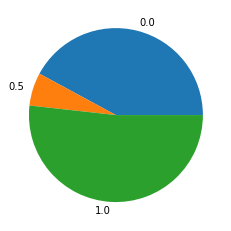

In [ ]:
df = pd.DataFrame(ans)
# print(df)
result = df.groupby([0]).size()
tot = (result[0.5]+result[1]+result[0])
# result.plot(kind = "pie", title = "Results")
plt.pie(result, labels = result.index)
print(result)

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
CM = (confusion_matrix(Test_Y, predictions_NB))
PS=precision_score(Test_Y, predictions_NB, average='binary')
RS=recall_score(Test_Y, predictions_NB, average='binary')
print(CM)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100, "%")
print("Naive Bayes Precision Score ->", PS)
print("Naive Bayes Recall Score ->", RS)

[[ 91  82]
 [ 15 154]]
Naive Bayes Accuracy Score ->  71.6374269005848 %
Naive Bayes Precision Score -> 0.652542372881356
Naive Bayes Recall Score -> 0.9112426035502958


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(Train_X_Tfidf, Train_Y)
pred_Y = clf.predict(Test_X_Tfidf)

CM = (confusion_matrix(Test_Y, pred_Y))
PS = precision_score(Test_Y, pred_Y, average='binary')
RS = recall_score(Test_Y, pred_Y, average='binary')
print(CM)
print("Logistic Regression Accuracy Score -> ",accuracy_score(pred_Y, Test_Y)*100, "%")
print("Logistic Regression  Precision Score ->", PS)
print("Logistic Regression  Recall Score ->", RS)

[[ 97  76]
 [ 14 155]]
Logistic Regression Accuracy Score ->  73.68421052631578 %
Logistic Regression  Precision Score -> 0.670995670995671
Logistic Regression  Recall Score -> 0.9171597633136095


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(Train_X)
x_test = bow_converter.fit_transform(Test_X)
words = bow_converter.get_feature_names()
len(words)

clf = LogisticRegression(random_state=0)
clf.fit(x, Train_Y)
pred_Y = clf.predict(x_test)

CM = (confusion_matrix(Test_Y, pred_Y))
PS = precision_score(Test_Y, pred_Y, average='binary')
RS = recall_score(Test_Y, pred_Y, average='binary')
print(CM)
print("Logistic Regression Accuracy Score -> ",accuracy_score(pred_Y, Test_Y)*100, "%")
print("Logistic Regression  Precision Score ->", PS)
print("Logistic Regression  Recall Score ->", RS)


[[ 82  91]
 [ 42 127]]
Logistic Regression Accuracy Score ->  61.111111111111114 %
Logistic Regression  Precision Score -> 0.5825688073394495
Logistic Regression  Recall Score -> 0.7514792899408284


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Train_X_Tfidf, Train_Y)
pred_Y = clf.predict(Test_X_Tfidf)

CM = (confusion_matrix(Test_Y, pred_Y))
PS = precision_score(Test_Y, pred_Y, average='binary')
RS = recall_score(Test_Y, pred_Y, average='binary')
print(CM)
print("Logistic Regression Accuracy Score -> ",accuracy_score(pred_Y, Test_Y)*100, "%")
print("Logistic Regression  Precision Score ->", PS)
print("Logistic Regression  Recall Score ->", RS)

[[  0 173]
 [  0 169]]
Logistic Regression Accuracy Score ->  49.41520467836257 %
Logistic Regression  Precision Score -> 0.49415204678362573
Logistic Regression  Recall Score -> 1.0
